In [1]:
# It is implememnted using ARIMA(Autoregressive Integrated Moving Averages)

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.columns=['Month','Champagne Sales']
df.head()

,Month,Champagne Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.shape

(107, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            106 non-null    object 
 1   Champagne Sales  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [7]:
df.describe()

,Champagne Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [8]:
df.tail()

,Month,Champagne Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
df.drop(106,axis=0,inplace=True)
df.tail()

,Month,Champagne Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [10]:
df.drop(105,axis=0,inplace=True)
df.tail()

,Month,Champagne Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
# convert the month to datetime
df['Month'] =pd.to_datetime(df['Month'])
df.head()

,Month,Champagne Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
df.set_index('Month',inplace=True)
df.head()

,Champagne Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<AxesSubplot:xlabel='Month'>

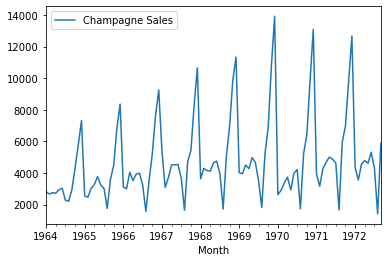

In [13]:
# step 2 visualization
df.plot()

In [14]:
# testing for stationary
from statsmodels.tsa.stattools import adfuller

In [15]:
test_result = adfuller(df['Champagne Sales'])

In [16]:
test_result

(-1.8335930563276202,
 0.36391577166024636,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [20]:
# H0: it is non stationary
# H1:it is stationary
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observation Used']
    for value,labels in zip(result,labels):
        print(labels+':'+str(value))
    if result[1] <= 0.05:
        print('it is stationary')
    else:
        print('it is not stationary')
    

In [21]:
adfuller_test(df['Champagne Sales'])

ADF Test Statistic:-1.833593056327624
p-value:0.36391577166024447
#Lags Used:11
Number of Observation Used:93
it is not stationary


In [22]:
# if the data is not stationary 

# differencing

In [23]:
df['Seasonal First difference'] = df['Champagne Sales'] - df['Champagne Sales'].shift(12)

In [24]:
df.head()

,Champagne Sales,Seasonal First difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN


In [25]:
adfuller_test(df['Seasonal First difference'].dropna())

ADF Test Statistic:-7.626619157213162
p-value:2.060579696813685e-11
#Lags Used:0
Number of Observation Used:92
it is stationary


<AxesSubplot:xlabel='Month'>

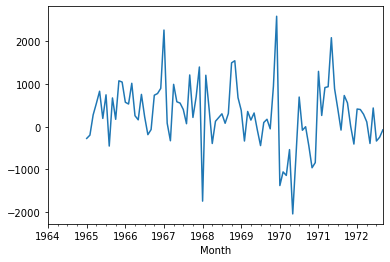

In [26]:
df['Seasonal First difference'].plotot()